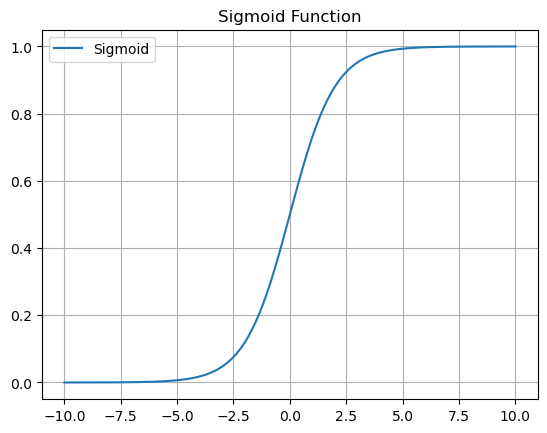

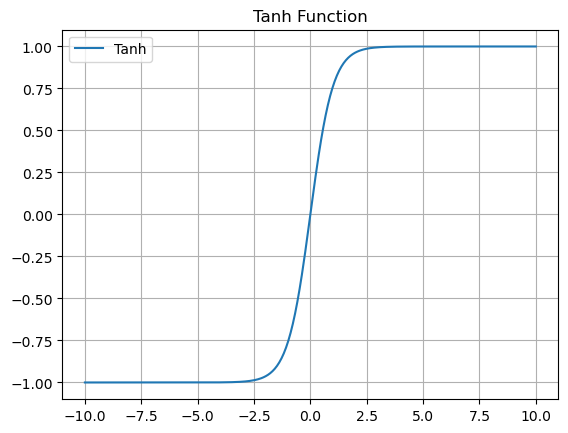

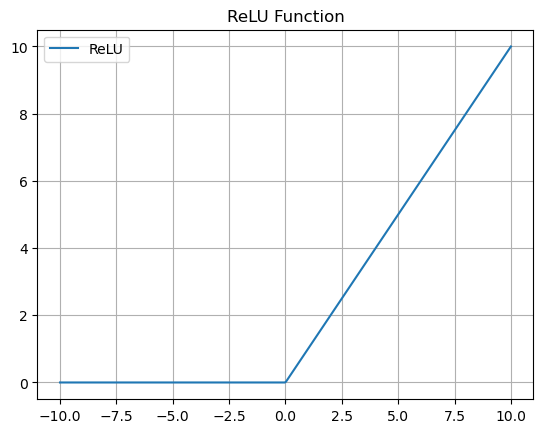

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 400)

plt.figure()
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(x, tanh(x), label='Tanh')
plt.title('Tanh Function')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(x, relu(x), label='ReLU')
plt.title('ReLU Function')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
#Assignment 2

def andnot_mcp(x1, x2):
    # Weights
    w1 = 1
    w2 = -1
    threshold = 1

    # Weighted sum
    net_input = x1 * w1 + x2 * w2

    # Activation function (step)
    if net_input >= threshold:
        return 1
    else:
        return 0

# Test all inputs
print("AND-NOT Function (x1 AND NOT x2):")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        output = andnot_mcp(x1, x2)
        print(f"x1: {x1}, x2: {x2} => Output: {output}")


AND-NOT Function (x1 AND NOT x2):
x1: 0, x2: 0 => Output: 0
x1: 0, x2: 1 => Output: 0
x1: 1, x2: 0 => Output: 1
x1: 1, x2: 1 => Output: 0


In [7]:
#Assignment 3

import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

# Training data: digits 0-9 in 7-bit ASCII binary
X = []
y = []

for i in range(10):
    binary = list(map(int, format(ord(str(i)), '07b')))
    X.append(binary)
    y.append(1 if i % 2 == 1 else 0)  # 1 = odd, 0 = even

X = np.array(X)
y = np.array(y)

# Initialize weights and bias
weights = np.zeros(7)
bias = 0
lr = 0.1  # learning rate

# Training the perceptron
for epoch in range(10):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = step(z)
        error = y[i] - pred
        weights += lr * error * X[i]
        bias += lr * error

# Test the perceptron
print("Digit Classification (0 = Even, 1 = Odd):")
for i in range(10):
    x_test = np.array(list(map(int, format(ord(str(i)), '07b'))))
    z = np.dot(x_test, weights) + bias
    output = step(z)
    print(f"Digit: {i}, Predicted: {'Odd' if output == 1 else 'Even'}")

Digit Classification (0 = Even, 1 = Odd):
Digit: 0, Predicted: Even
Digit: 1, Predicted: Odd
Digit: 2, Predicted: Even
Digit: 3, Predicted: Odd
Digit: 4, Predicted: Even
Digit: 5, Predicted: Odd
Digit: 6, Predicted: Even
Digit: 7, Predicted: Odd
Digit: 8, Predicted: Even
Digit: 9, Predicted: Odd


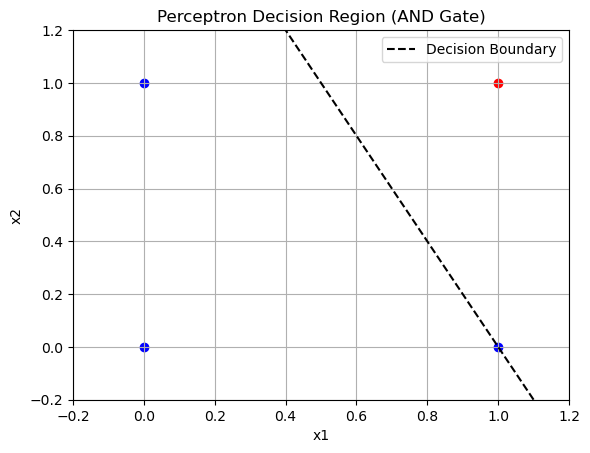

In [8]:
#Assignment 4

import numpy as np
import matplotlib.pyplot as plt

# AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
w = np.zeros(2)
b = 0
lr = 0.1  # learning rate

# Perceptron learning
for epoch in range(10):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

# Plotting
x1 = np.linspace(-0.2, 1.2, 100)
x2 = -(w[0]*x1 + b) / w[1]

plt.figure()
# Plot data points
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color='red' if y[i] == 1 else 'blue')

# Decision boundary
plt.plot(x1, x2, 'k--', label='Decision Boundary')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Region (AND Gate)')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
#Assignment 5

import numpy as np

# Define bipolar input-output pairs
X = np.array([[1, -1, 1], [-1, 1, -1]])   # 2 input vectors (3 elements)
Y = np.array([[1, 1], [-1, -1]])          # 2 output vectors (2 elements)

# Calculate weight matrix (Hebbian learning)
W = X.T @ Y

# Test BAM recall
def recall_bam(x_input):
    y = np.sign(x_input @ W)
    x_recalled = np.sign(y @ W.T)
    return y, x_recalled

# Try recalling both patterns
for i in range(len(X)):
    print(f"\nInput X: {X[i]}")
    y_out, x_recalled = recall_bam(X[i])
    print(f"Recalled Y: {y_out}")
    print(f"Recalled X: {x_recalled}")



Input X: [ 1 -1  1]
Recalled Y: [1 1]
Recalled X: [ 1 -1  1]

Input X: [-1  1 -1]
Recalled Y: [-1 -1]
Recalled X: [-1  1 -1]


In [11]:
#Assignment 6

import numpy as np

# Sigmoid and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)

# XOR input and output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
np.random.seed(1)
w1 = np.random.randn(2, 2)  # input to hidden
b1 = np.zeros((1, 2))
w2 = np.random.randn(2, 1)  # hidden to output
b2 = np.zeros((1, 1))

# Training loop
for epoch in range(10000):
    # --- Forward Propagation ---
    z1 = X @ w1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ w2 + b2
    a2 = sigmoid(z2)

    # --- Back Propagation ---
    error = y - a2
    d_a2 = error * sigmoid_deriv(a2)

    error_hidden = d_a2 @ w2.T
    d_a1 = error_hidden * sigmoid_deriv(a1)

    # Update weights and biases
    w2 += a1.T @ d_a2 * 0.1
    b2 += np.sum(d_a2, axis=0, keepdims=True) * 0.1

    w1 += X.T @ d_a1 * 0.1
    b1 += np.sum(d_a1, axis=0, keepdims=True) * 0.1

# --- Final output ---
print("Trained Output for XOR:")
print(np.round(a2, 3))


Trained Output for XOR:
[[0.047]
 [0.945]
 [0.944]
 [0.074]]


In [27]:
#Assignment 7

import numpy as np

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)

# XOR input and output (binary)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(0)
w1 = np.random.rand(2, 2)
b1 = np.zeros((1, 2))
w2 = np.random.rand(2, 1)
b2 = np.zeros((1, 1))

# Training loop
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Backward pass
    error = y - a2
    d_output = error * sigmoid_deriv(a2)
    d_hidden = d_output.dot(w2.T) * sigmoid_deriv(a1)

    # Update weights and biases
    w2 += a1.T.dot(d_output) * 0.1
    b2 += np.sum(d_output) * 0.1
    w1 += X.T.dot(d_hidden) * 0.1
    b1 += np.sum(d_hidden) * 0.1
    
    if epoch % 1000 == 0: 
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}") 

# Test output
print("Final output after training:")
print(np.round(a2, 3))

Epoch 0, Error: 0.4982223878379592
Epoch 1000, Error: 0.49616226845546385
Epoch 2000, Error: 0.473445164630785
Epoch 3000, Error: 0.39438542336207183
Epoch 4000, Error: 0.2648735255817658
Epoch 5000, Error: 0.15723319711526554
Epoch 6000, Error: 0.11212749207387882
Epoch 7000, Error: 0.08928088006227965
Epoch 8000, Error: 0.07546539430537588
Epoch 9000, Error: 0.06613261195351446
Final output after training:
[[0.059]
 [0.943]
 [0.943]
 [0.064]]


In [13]:
#Assignment 8

import numpy as np

# Parameters
vigilance = 0.8

# Input patterns (binary)
patterns = [
    np.array([1, 0, 0, 1]),
    np.array([1, 1, 0, 1]),
    np.array([0, 0, 1, 0]),
    np.array([0, 0, 1, 1])
]

# Store categories
categories = []

def match_category(input_pattern, category):
    # Check match score (overlap)
    match = np.sum(np.logical_and(input_pattern, category)) / np.sum(input_pattern)
    return match >= vigilance

def train_art(patterns):
    for p in patterns:
        matched = False
        for i, cat in enumerate(categories):
            if match_category(p, cat):
                # Update existing category (AND rule)
                categories[i] = np.logical_and(categories[i], p)
                matched = True
                break
        if not matched:
            categories.append(p.copy())

# Train ART network
train_art(patterns)

# Output the result
print("Formed categories:")
for i, c in enumerate(categories):
    print(f"Category {i+1}: {c.astype(int)}")

Formed categories:
Category 1: [1 0 0 1]
Category 2: [1 1 0 1]
Category 3: [0 0 1 0]
Category 4: [0 0 1 1]


In [28]:
#Assignment 9

import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# XOR input and output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(1)
w1 = np.random.rand(2, 2)  # input to hidden layer weights
b1 = np.zeros((1, 2))      # hidden layer biases
w2 = np.random.rand(2, 1)  # hidden to output layer weights
b2 = np.zeros((1, 1))      # output layer biases

# Training loop
learning_rate = 0.1
for epoch in range(10000):
    # --- Forward Propagation ---
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)   # hidden layer activation
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)   # output layer activation

    # --- Backpropagation ---
    error = y - a2
    d_a2 = error * sigmoid_deriv(a2)

    error_hidden = d_a2.dot(w2.T)
    d_a1 = error_hidden * sigmoid_deriv(a1)

    # Update weights and biases
    w2 += a1.T.dot(d_a2) * learning_rate
    b2 += np.sum(d_a2) * learning_rate

    w1 += X.T.dot(d_a1) * learning_rate
    b1 += np.sum(d_a1) * learning_rate

# Test output
print("Trained output for XOR:")
print(np.round(a2, 3))

Trained output for XOR:
[[0.069]
 [0.931]
 [0.932]
 [0.078]]


In [1]:
#Group C-1

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1️⃣ Data Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# 2️⃣ Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28*28, 10)  # Input size = 784, Output = 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        return self.linear(x)

model = LogisticRegressionModel()

# 3️⃣ Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4️⃣ Training Loop
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

# 5️⃣ Evaluation on Test Set
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Epoch 1, Loss: 0.6137
Epoch 2, Loss: 0.3871
Epoch 3, Loss: 0.3527
Epoch 4, Loss: 0.3345
Epoch 5, Loss: 0.3239
Test Accuracy: 91.25%


In [2]:
#Group C-2

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Define CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model, loss, optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.0710
Epoch 2, Loss: 0.0134
Epoch 3, Loss: 0.0719
Epoch 4, Loss: 0.1766
Epoch 5, Loss: 0.0013


In [3]:
#Group C-4


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load Data
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=1000, shuffle=False)

# Define Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Testing
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1, Loss: 0.1615
Epoch 2, Loss: 0.2323
Epoch 3, Loss: 0.0566
Epoch 4, Loss: 0.1122
Epoch 5, Loss: 0.0753
Test Accuracy: 96.93%
